In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from number_recognition_network import *

In [2]:
df_pd = pd.read_csv('train.csv')
df = np.array(df_pd)
m, n = df.shape

print("Images:", m, "\nPixels:", n-1)

Images: 42000 
Pixels: 784


In [3]:
# Each column is an entry, rows are features.

test_set = df[0:1000].T
X_test, y_test = test_set[1:n]/255, test_set[0]

print(X_test.shape, y_test.shape)

(784, 1000) (1000,)


In [4]:
# Each column is an entry, rows are features.

training_set = df[1000:m].T
X_train, y_train = training_set[1:n]/255, training_set[0]

print(X_train.shape, y_train.shape)

(784, 41000) (41000,)


Eample No:    16620/41000
Known Label:  0


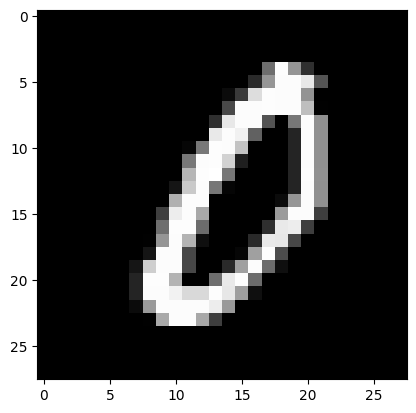

In [5]:
'''Data visualizer'''

index = np.random.randint(0, X_train.shape[1])
image = X_train[:, index, None]
label = y_train[index]

print("Eample No:   ", f"{index}/{y_train.size}")
print("Known Label: ", label)

plt.imshow(image.reshape((28, 28)), interpolation='nearest')
plt.gray()
plt.show()

In [6]:
'''Train the network'''

weight_layer_1, bias_layer_1, weight_layer_2, bias_layer_2, training_log = gradient_descent(X_train, y_train, n_hidden=20, lr=0.1, n_iters=201)

Iteration    0 | Loss: 2.5137 | Train Score: 0.0600

Iteration   10 | Loss: 1.9212 | Train Score: 0.4006

Iteration   20 | Loss: 1.4484 | Train Score: 0.6405

Iteration   30 | Loss: 1.1219 | Train Score: 0.7276

Iteration   40 | Loss: 0.9253 | Train Score: 0.7678

Iteration   50 | Loss: 0.8023 | Train Score: 0.7927

Iteration   60 | Loss: 0.7186 | Train Score: 0.8126

Iteration   70 | Loss: 0.6575 | Train Score: 0.8281

Iteration   80 | Loss: 0.6106 | Train Score: 0.8399

Iteration   90 | Loss: 0.5732 | Train Score: 0.8483

Iteration  100 | Loss: 0.5427 | Train Score: 0.8553

Iteration  110 | Loss: 0.5173 | Train Score: 0.8615

Iteration  120 | Loss: 0.4958 | Train Score: 0.8666

Iteration  130 | Loss: 0.4773 | Train Score: 0.8711

Iteration  140 | Loss: 0.4613 | Train Score: 0.8752

Iteration  150 | Loss: 0.4473 | Train Score: 0.8786

Iteration  160 | Loss: 0.4349 | Train Score: 0.8819

Iteration  170 | Loss: 0.4239 | Train Score: 0.8846

Iteration  180 | Loss: 0.4141 | Train Score: 0

In [7]:
pd.DataFrame(training_log)

,train_loss,train_acc
0,2.513684,0.059976
1,1.921207,0.400585
2,1.448408,0.640463
3,1.121881,0.727634
4,0.925266,0.767829
5,0.802313,0.792683
6,0.718640,0.812610
7,0.657504,0.828146
8,0.610582,0.839902
9,0.573247,0.848341


In [8]:
'''Training Score'''

_, _, _, A2 = forward_prop(weight_layer_1, bias_layer_1, weight_layer_2, bias_layer_2, X_train)
y_prediction = predict(A2)
score(y_prediction, y_train)

np.float64(0.8916585365853659)

In [9]:
'''Test score'''

_, _, _, A2 = forward_prop(weight_layer_1, bias_layer_1, weight_layer_2, bias_layer_2, X_test)
y_prediction = predict(A2)
score(y_prediction, y_test)

np.float64(0.895)

Eample No:         23164/41000
Known Label:       8
Model Prediction:  8
Prediction:        True
Confidence:        High: 99.61%

Network Reasoning
8    0.996055
2    0.001222
9    0.000962
5    0.000502
6    0.000450
3    0.000261
7    0.000191
4    0.000129
0    0.000121
1    0.000107


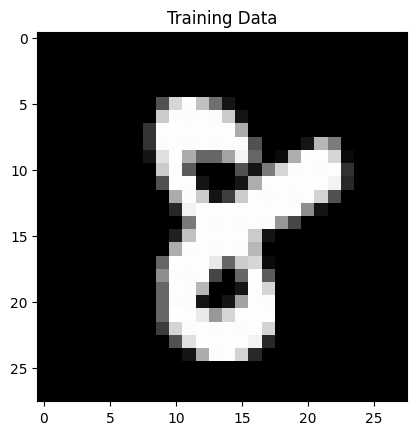

In [10]:
'''Predicting random number from the training set'''

index = np.random.randint(0, X_train.shape[1])
image = X_train[:, index, None]
label = y_train[index]

_, _, _, A2 = forward_prop(weight_layer_1, bias_layer_1, weight_layer_2, bias_layer_2, image)
prediction = predict(A2)
confidence = pd.Series(A2.flatten())

levels = {
    0.9: "High",
    0.7: "Moderate",
    0.5: "Low",
    0.0: "Not Significant",
}
conf_level = [levels[threshold] for threshold in levels.keys() if confidence.max() >= threshold]

print("Eample No:        ", f"{index}/{y_train.size}")
print("Known Label:      ", label)
print("Model Prediction: ", prediction.item())
print("Prediction:       ", prediction.item()==label)
print(f"Confidence:        {conf_level[0]}: {confidence.max():.2%}")
print(f"\nNetwork Reasoning\n{confidence.sort_values(ascending=False).to_string()}")
plt.title("Training Data")
plt.gray()
plt.imshow(image.reshape((28, 28)) * 255, interpolation='nearest')
plt.show()

Eample No:         559/1000
Known Label:       2
Model Prediction:  8
Prediction:        False
Confidence:        Moderate: 85.24%

Network Reasoning
8    85.24
2     8.12
5     2.49
0     2.17
3     1.83
7     0.10
1     0.02
6     0.01
9     0.01
4     0.00


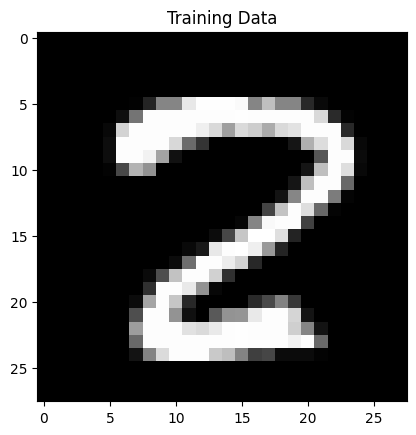

In [11]:
'''Predicting random number from the test set'''

index = np.random.randint(0, X_test.shape[1])
image = X_test[:, index, None]
label = y_test[index]

_, _, _, A2 = forward_prop(weight_layer_1, bias_layer_1, weight_layer_2, bias_layer_2, image)
prediction = predict(A2)
confidence = pd.Series(A2.flatten())


levels = {
    0.9: "High",
    0.7: "Moderate",
    0.5: "Low",
    0.0: "Not Significant",
}
conf_level = [levels[threshold] for threshold in levels.keys() if confidence.max() >= threshold]

print("Eample No:        ", f"{index}/{y_test.size}")
print("Known Label:      ", label)
print("Model Prediction: ", prediction.item())
print("Prediction:       ", prediction.item()==label)
print(f"Confidence:        {conf_level[0]}: {confidence.max():.2%}")
print(f"\nNetwork Reasoning\n{round(confidence*100,2).sort_values(ascending=False).to_string()}")
plt.title("Training Data")
plt.gray()
plt.imshow(image.reshape((28, 28)) * 255, interpolation='nearest')
plt.show()